Igor Martins Frota

Student Number: 1011330490

26-09-2024

# Pre-lecture

## 1.

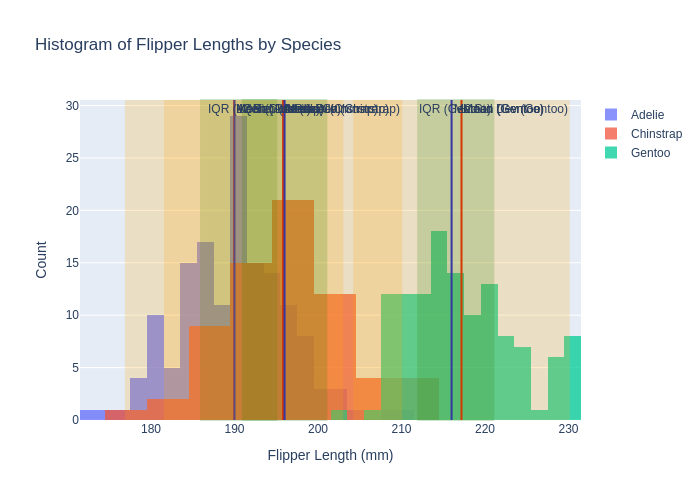

In [6]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Drop rows with missing values in 'flipper_length_mm'
penguins = penguins.dropna(subset=['flipper_length_mm'])

# Calculate statistics for each species
stats = penguins.groupby('species')['flipper_length_mm'].agg(
    mean='mean', median='median', min='min', max='max', std='std'
)

# Calculate IQR (interquartile range)
stats['q1'] = penguins.groupby('species')['flipper_length_mm'].quantile(0.25)
stats['q3'] = penguins.groupby('species')['flipper_length_mm'].quantile(0.75)
stats['iqr'] = stats['q3'] - stats['q1']

# Calculate lower and upper bounds (mean ± 2*std)
stats['lower_bound'] = stats['mean'] - 2 * stats['std']
stats['upper_bound'] = stats['mean'] + 2 * stats['std']

# Prepare the histogram figure
fig = go.Figure()

# Create histograms for each species
for species in penguins['species'].unique():
    species_data = penguins[penguins['species'] == species]
    fig.add_trace(go.Histogram(x=species_data['flipper_length_mm'], name=species, opacity=0.75))

    # Add lines and rectangles for statistics
    mean = stats.loc[species, 'mean']
    median = stats.loc[species, 'median']
    iqr_lower = stats.loc[species, 'q1']
    iqr_upper = stats.loc[species, 'q3']
    lower_bound = stats.loc[species, 'lower_bound']
    upper_bound = stats.loc[species, 'upper_bound']

    # Vertical lines for mean and median
    fig.add_vline(x=mean, line_width=2, line_color='red', annotation_text=f'Mean ({species})', annotation_position='top right')
    fig.add_vline(x=median, line_width=2, line_color='blue', annotation_text=f'Median ({species})', annotation_position='top right')

    # Horizontal rectangles for interquartile range (IQR)
    fig.add_vrect(x0=iqr_lower, x1=iqr_upper, line_color='green', fillcolor='green', opacity=0.2, annotation_text=f'IQR ({species})')

    # Vertical rectangles for ±2 standard deviations
    fig.add_vrect(x0=lower_bound, x1=upper_bound, fillcolor='orange', opacity=0.2, line_width=0, annotation_text=f'±2 Std Dev ({species})')

# Update layout
fig.update_layout(title='Histogram of Flipper Lengths by Species',
                  xaxis_title='Flipper Length (mm)',
                  yaxis_title='Count',
                  barmode='overlay')

fig.show(renderer="png")

### ChatGPT Summary - Question 1
>In this session, you asked for help using Plotly in Python to visualize data from a penguin dataset. Specifically, you wanted to create histograms of `flipper_length_mm` for each penguin species and overlay important statistical markers such as the mean, median, range, interquartile range (IQR), and two standard deviations (±2σ).

>### Key Steps We Covered:
>1. **Data Preprocessing**: Loading the dataset and handling missing values for `flipper_length_mm`.
>2. **Plot Creation**: Using Plotly to create histograms of `flipper_length_mm` for each species.
>3. **Statistical Calculations**: Computing the mean, median, range (min to max), IQR (Q1 to Q3), and two standard deviations away from the mean for each species.
>4. **Plot Annotations**:
   >- **`add_vline()`**: Adding vertical lines to mark the mean and median.
   >- **`add_vrect()`**: Adding shaded rectangles to highlight the range, IQR, and ±2σ regions on the histogram.

>### Result:
>For each species, a customized histogram was produced showing key statistics, with vertical lines for the mean and median, and shaded areas representing the range, IQR, and ±2σ intervals.

### ChatGPT Session Log - Question 1
[STA130 - Week 03 - Homework - Question 1](https://chatgpt.com/share/66f5fb48-5a98-8001-a340-ed85a7348aa9)

## 2.

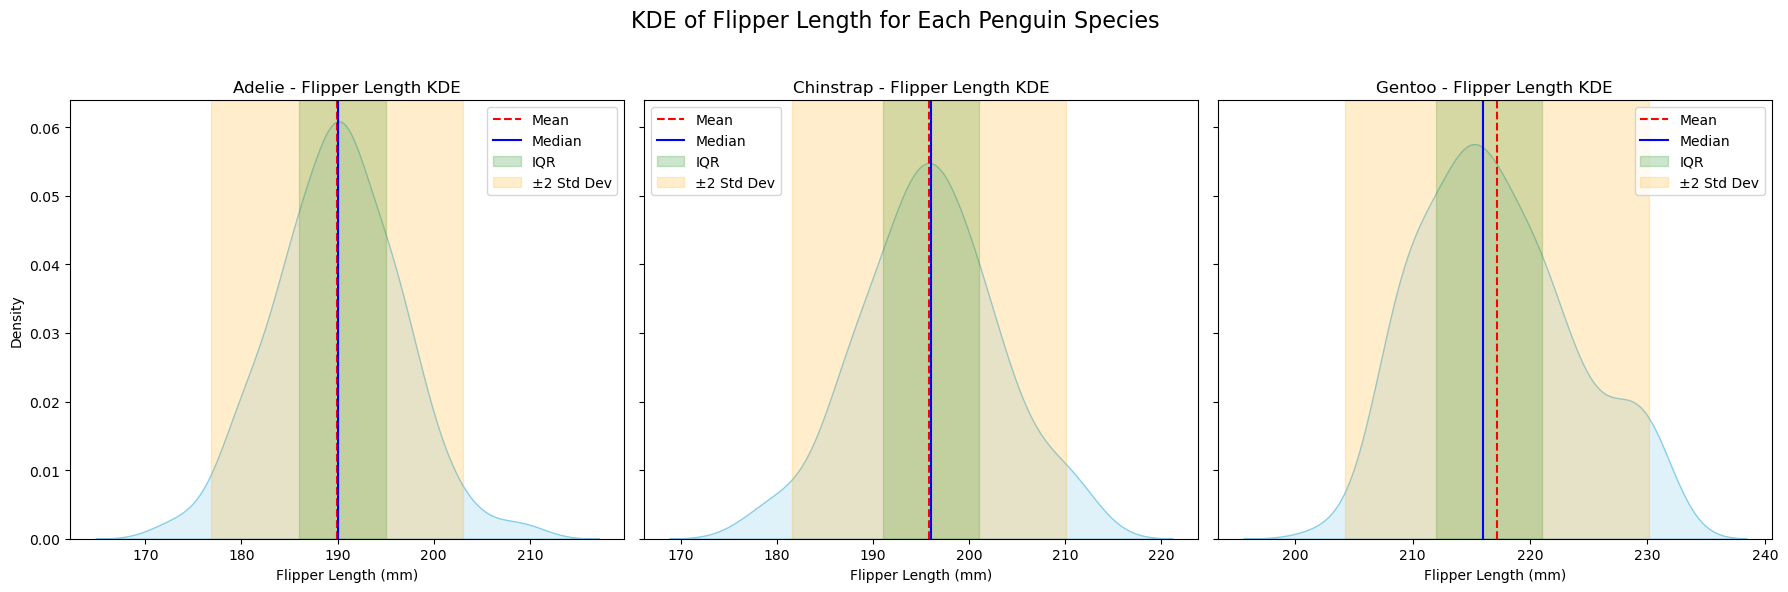

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Drop rows with missing values in 'flipper_length_mm'
penguins = penguins.dropna(subset=['flipper_length_mm'])

# Calculate statistics for each species
stats = penguins.groupby('species')['flipper_length_mm'].agg(
    mean='mean', median='median', min='min', max='max', std='std'
)

# Calculate IQR (interquartile range)
stats['q1'] = penguins.groupby('species')['flipper_length_mm'].quantile(0.25)
stats['q3'] = penguins.groupby('species')['flipper_length_mm'].quantile(0.75)
stats['iqr'] = stats['q3'] - stats['q1']

# Calculate lower and upper bounds (mean ± 2*std)
stats['lower_bound'] = stats['mean'] - 2 * stats['std']
stats['upper_bound'] = stats['mean'] + 2 * stats['std']

# Create subplots for side-by-side KDE plots
species_list = penguins['species'].unique()
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Create KDE plots for each species
for i, species in enumerate(species_list):
    species_data = penguins[penguins['species'] == species]
    
    # KDE plot
    sns.kdeplot(species_data['flipper_length_mm'], ax=axes[i], fill=True, color='skyblue')
    
    # Add lines for key statistics
    mean = stats.loc[species, 'mean']
    median = stats.loc[species, 'median']
    iqr_lower = stats.loc[species, 'q1']
    iqr_upper = stats.loc[species, 'q3']
    lower_bound = stats.loc[species, 'lower_bound']
    upper_bound = stats.loc[species, 'upper_bound']

    # Plot the mean, median, IQR, and ±2 std dev lines
    axes[i].axvline(mean, color='red', linestyle='--', label='Mean')
    axes[i].axvline(median, color='blue', linestyle='-', label='Median')
    axes[i].axvspan(iqr_lower, iqr_upper, color='green', alpha=0.2, label='IQR')
    axes[i].axvspan(lower_bound, upper_bound, color='orange', alpha=0.2, label='±2 Std Dev')

    # Title and labels
    axes[i].set_title(f'{species} - Flipper Length KDE')
    axes[i].set_xlabel('Flipper Length (mm)')
    axes[i].legend()

# Overall plot adjustments
fig.suptitle('KDE of Flipper Length for Each Penguin Species', fontsize=16)
axes[0].set_ylabel('Density')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### ChatGPT Summary - Question 2

>1. **Plotly Histogram Request**: 
>   - You initially asked to create histograms of the `flipper_length_mm` data from the penguins dataset for each species using Plotly. You wanted to include annotations for key statistics (mean, median, IQR, and ranges based on ±2 standard deviations) using `fig.add_hline()`, `fig.add_vline()`, `fig.add_hrect()`, and `fig.add_vrect()`.
>   - After receiving an error, we identified that the issue was with the improper use of the `quantile` function. The fix involved explicitly calculating the 25th and 75th percentiles for each species and then plotting the histograms with the correct annotations.

>2. **Seaborn KDE Plots**:
>   - You then requested to switch from Plotly to Seaborn and to create three side-by-side KDE (kernel density estimate) plots for the `flipper_length_mm` data of each penguin species.
>   - We created the KDE plots for each species, along with annotations for key statistics (mean, median, IQR, and ±2 standard deviation ranges), using `sns.kdeplot()` and Matplotlib's `axvline` and `axvspan` for visualizing these values.

>Throughout the session, we worked through Python errors and focused on visualizing key descriptive statistics using both Plotly and Seaborn, based on your requirements.

### ChatGPT Session Log - Question 2
[STA130 - Week 03 - Homework - Question 2](https://chatgpt.com/share/66f5fc4f-8618-8001-af64-4e0074b32ea7)

## 3.

My preference on the three "data distribution" visualization depends on what kind of analysis I am doing, the context in which I am doing them, who the audience is, and other factors.

I would choose box plots over the other three if I wanted to, for example, visually display where the quartiles and median are located, and how far off the outliers are from the rest of the data. I would also choose box plots if I were comparing distributions of different data samples and seeing what ranges of data each sample encompasses.

By contrast, I would choose histograms to visually display the sample's distribution shape and analyze its modality (whether it's unimodal, bimodal, or multimodal). Histograms also allow me to control how precise I want the data to be. I could increase the size of the bins (to see things such as general trends in the data), or I could decrease the size of the bins (to analyze and display the data with more detail).

Using a kernel density estimator (KDE) provides me the same benefits as a histogram. However, as KDEs do not have bins, they allow me to view the data with infinately more precision than a histogram, which could be useful when I want to identify and analyze undedrlying trends in the data. 

### ChatGPT Summary - Question 3

>In this session, you described and contrasted three methods of data visualization: **Box Plots**, **Histograms**, and **Kernel Density Estimators (KDEs)**. I confirmed the accuracy of your descriptions and provided a detailed analysis of each method, highlighting their **pros and cons**.

>1. **Box Plots**:
  > - Pros: Compact summary of data, good for comparing distributions, highlights outliers.
  > - Cons: Lacks detail about data distribution within quartiles, not ideal for small datasets.

>2. **Histograms**:
  > - Pros: Displays data frequency, adjustable bin size for precision, easy to interpret.
  > - Cons: Sensitive to bin size, no smooth transitions, doesn’t show outliers explicitly.

>3. **KDEs**:
  > - Pros: Smooth, continuous data representation, no bin requirement, high precision.
   >- Cons: Requires careful tuning (bandwidth), harder to interpret, may mislead with small datasets.

>Each method has different strengths, with box plots focusing on summarization, histograms on frequency distribution, and KDEs on smooth, detailed trends.

### ChatGPT Session Log - Question 3
[STA130 - Week 03 - Homework - Question 3](https://chatgpt.com/share/66f5fca1-45fc-8001-9d0a-356d025c55b5)

## 4.

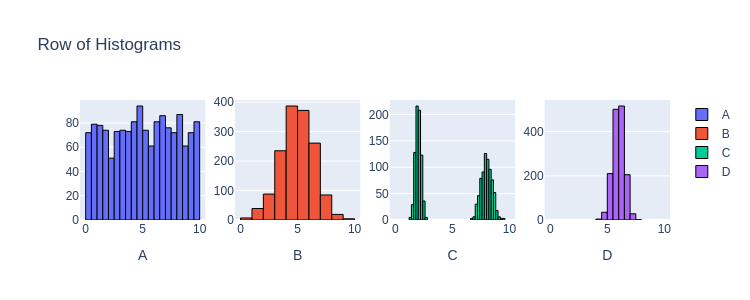

In [8]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer = "png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [12]:
np.mean(data1)

5.047786715023923

In [14]:
np.mean(data2)

4.965908239567437

In [15]:
np.mean(data3)

4.9997128164518685

In [19]:
np.mean(data4)

5.995734515128696

In [31]:
np.var(data1)

8.236393515426538

In [32]:
np.var(data2)

2.2037958431920024

In [33]:
np.var(data3)

9.132683491672406

In [34]:
np.var(data4)

0.2567627184357

| Data | Mean | Variance |
| ----------- | ----------- | ----------- |
| A | 5.047786715023923 | 8.236393515426538 |
| B | 4.965908239567437 | 2.2037958431920024 |
| C | 4.9997128164518685 | 9.132683491672406 |
| D | 5.995734515128696 | 0.2567627184357 |

**1.** Datasets "B" and "D" have similar means and variances.

----

**2.** Datasets "B" and "C" have similar means but different vairances.

----

**3.** Datasets "A" and "C" have similar variances but different means.

----

**4.** Datasets "B" and "D" and "C" and "D" have different means and variances.

# Post-lecture

## 5.

The skewness directly affects how the mean and median relate to each other. 

In a right-skewed distribution, there are extremely large values, and as such, the mean gets pulled to the right and causes it to become larger than the median. 

A left-skewed distribution is the opposite of a right-skewed distribution, and as such it has opposite effects. In this case, extremely small values pull the mean to the left, which causes it to become smaller than the median.

The effects of a right- or left-skewed distribution can be seen below through this code:

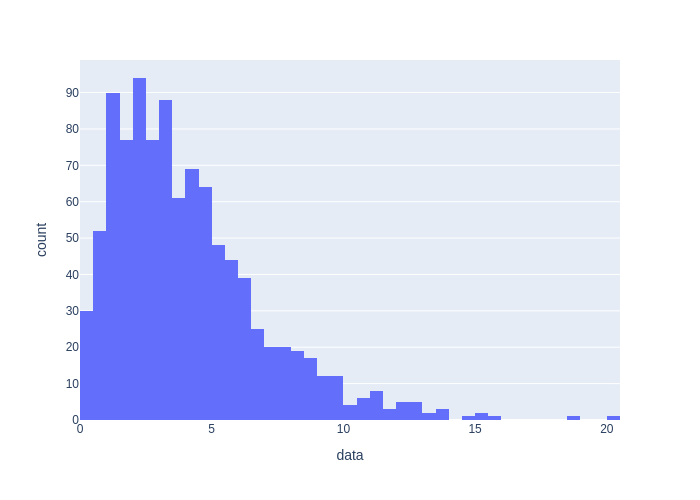

In [40]:
from scipy import stats
import pandas as pd
import numpy as np
  
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")

sample1.mean()
np.quantile(sample1, [0.5])

fig1.show(renderer = "png")

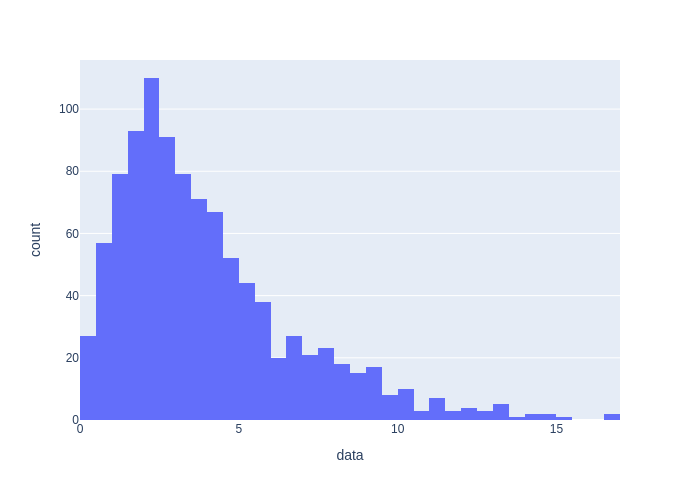

In [3]:
from scipy import stats
import pandas as pd
import numpy as np
  
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")

sample1.mean()
np.quantile(sample1, [0.5])

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)

fig1.show(renderer="png")

In [35]:
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
# this generates a Gamma distribution, which is naturally right-skewed. As such, the mean will be greater tahn the median for this sample

In [38]:
sample1.mean() 
# calculates the mean of sample1 data

4.104559258237438

In [41]:
np.quantile(sample1, [0.5]) 
# calculates the median of sample1 data (by finding the 0.5 quantile (middle value))
# because the Gamma distribution is right-skewed, the median would be smaller than the mean

array([3.44469759])

In [42]:
sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)
# because the Gamma distribution is naturally right-skewed, multiplying it by -1 (-stats.gamma) makes it left-skewed
# therefore, the median would be larger than the mean

### ChatGPT Summary - Question 5

>In this session, we covered several key statistical concepts related to skewness and explored how these apply to the code you provided:

>1. **Relationship Between Mean, Median, and Skewness**:
  > - **Right-skewed distributions** (positive skew) have a longer tail on the right, with **mean > median**.
  > - **Left-skewed distributions** (negative skew) have a longer tail on the left, with **mean < median**.
  > - **Symmetric distributions** have **mean ≈ median**.

>2. **Analysis of the Code**:
  > - The code uses a **Gamma distribution** to generate a dataset (`sample1`) that is **right-skewed**. For this distribution, the mean is expected to be greater than the median.
 >  - A **negated Gamma distribution** (`sample2`) is generated to demonstrate **left-skewness**, where the mean is less than the median.
 >  - Quantiles were used to calculate the **median** (the 0.5 quantile), which divides the dataset in half.

>3. **Quantiles**:
  > - Quantiles divide the data into intervals with equal probabilities. The **0.5 quantile** is the median, which separates the data into two equal halves.
  > - In skewed distributions, the quantiles help understand the distribution's shape and the relationship between the mean and the median.

>4. **Gamma Distribution**:
  > - The **Gamma distribution** is always **right-skewed**, though the skewness decreases as the shape parameter increases. It never becomes left-skewed but can resemble a normal distribution for large shape parameters.

>This session provided a deeper understanding of how skewness affects the mean and median and how the Gamma distribution demonstrates these properties in your code.

### ChatGPT Session Log - Question 5
[STA130 - Week 03 - Homework - Question 5](https://chatgpt.com/share/66f5cbbd-dfc4-8001-aa82-f8064bee2533)

## 6.

In [38]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")
df

# the first step to summarizing statistics is to understand and look at the data being evaluated (by using, for example, a table)

,restaurant id,category id,item id,serving size (oz),calories,calories from fat,total fat (g),total fat (% daily value),saturated fat (g),saturated fat (% daily value),...,carbohydrates (g),carbohydrates (% daily value),dietary fiber (g),dietary fiber (% daily value),sugars (g),protein (g),vitamin a (% daily value),vitamin c (% daily value),calcium (% daily value),iron (% daily value)
0,1000,100,0,4.8,300,120.0,13.0,20.0,5.0,25.0,...,31,10.0,4,17.0,3.0,17.0,10.0,0.0,25.0,15.0
1,1000,100,1,4.8,250,70.0,8.0,12.0,3.0,15.0,...,30,10.0,4,17.0,3.0,18.0,6.0,0.0,25.0,8.0
2,1000,100,2,3.9,370,200.0,23.0,35.0,8.0,42.0,...,29,10.0,4,17.0,2.0,14.0,8.0,0.0,25.0,10.0
3,1000,100,3,5.7,450,250.0,28.0,43.0,10.0,52.0,...,30,10.0,4,17.0,2.0,21.0,15.0,0.0,30.0,15.0
4,1000,100,4,5.7,400,210.0,23.0,35.0,8.0,42.0,...,30,10.0,4,17.0,2.0,21.0,6.0,0.0,25.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,3000,130,745,NaN,180,NaN,14.0,NaN,NaN,NaN,...,12,NaN,3,NaN,NaN,4.0,NaN,NaN,NaN,NaN
746,3000,130,746,NaN,190,NaN,18.0,NaN,NaN,NaN,...,6,NaN,3,NaN,NaN,7.0,NaN,NaN,NaN,NaN
747,3000,100,747,NaN,340,NaN,13.0,NaN,NaN,NaN,...,38,NaN,0,NaN,NaN,18.0,NaN,NaN,NaN,NaN
748,3000,100,748,NaN,90,NaN,8.0,NaN,NaN,NaN,...,5,NaN,4,NaN,NaN,1.0,NaN,NaN,NaN,NaN


The second step is to graph this data using a histogram to look at its modality and other trends.
Changing the size of the bins can also help with this step (as seen below).

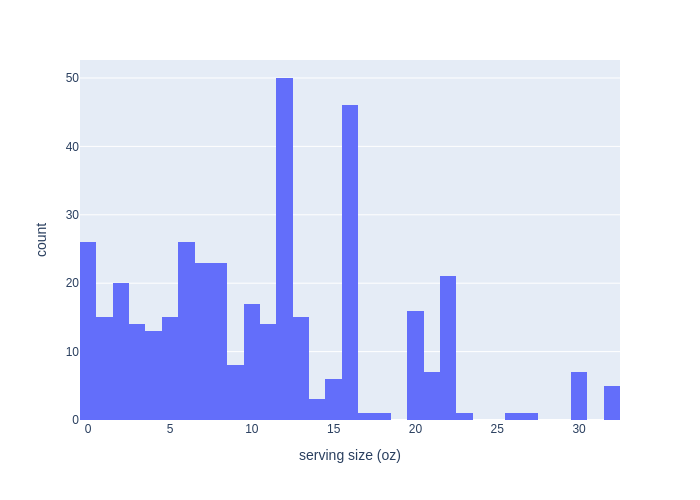

In [39]:
import plotly.express as px
fig = px.histogram(df, x="serving size (oz)", nbins=50)
fig.show(renderer="png")

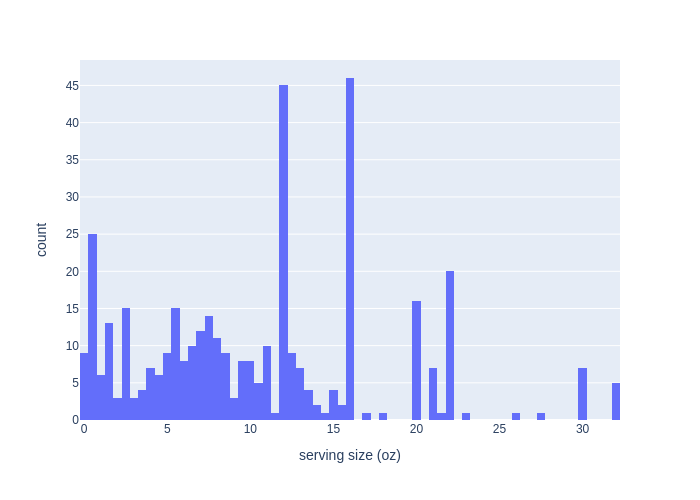

In [40]:
fig = px.histogram(df, x="serving size (oz)", nbins=100)
fig.show(renderer="png")

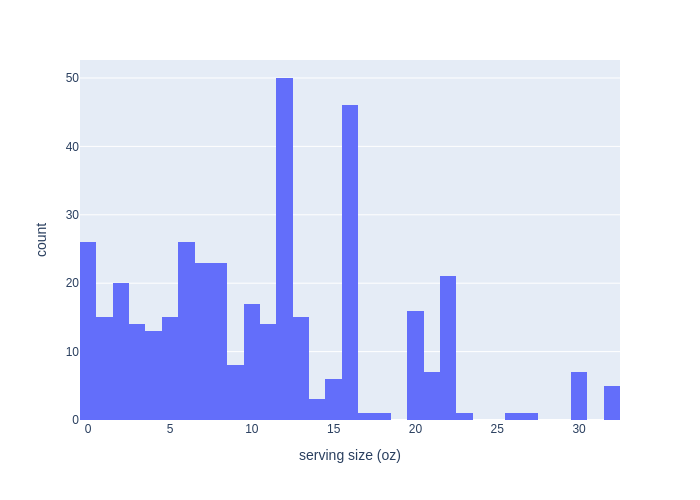

In [41]:
fig = px.histogram(df, x="serving size (oz)", nbins=32)
fig.show(renderer="png")

After looking and analyzing the histograms, it is evident that the serving sizes of fast food is usually between 0 and 15, 20 to around 23, and 30 oz. It is also clear that the most common serving sizes are 13 and 17 oz. However, as it is difficult to identify where the quartiles and the median are, use of a box plot is needed.

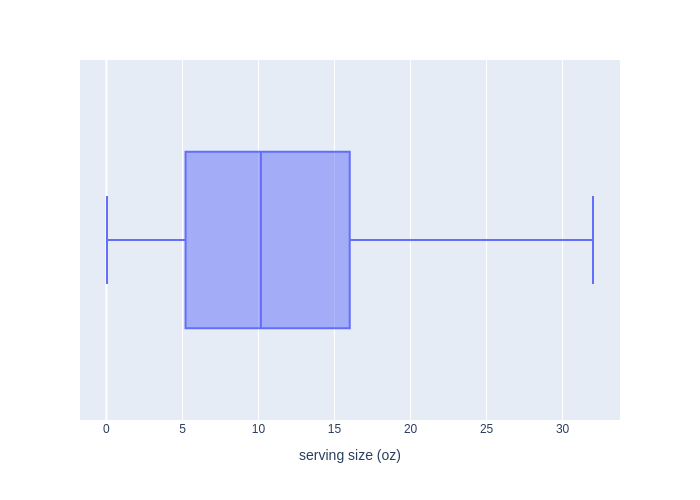

In [50]:
import plotly.express as px
fig = px.box(df, x="serving size (oz)")
fig.show(renderer="png")

This box plot shows where the median is and the 1st and 3rd quartiles. It is clear that half of all serving sizes are below 10 oz, and the other half are between 10 and 32 oz. Additionally, we can see that 50% of all sizes are between 5.2 and 16 oz, and that the largest and smallest sizes are 32 and 0.035 oz, respectivelly.